<a href="https://colab.research.google.com/github/aliya156/haihua_INFO5731_Spring2023/blob/main/NER_ChatGPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


data = pd.read_csv('mtsamples.csv')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = re.sub(r'\W', ' ', str(text))
    text = re.sub(r'\s+', ' ', text)
    words = nltk.word_tokenize(text)
    words = [lemmatizer.lemmatize(word.lower()) for word in words if word.lower() not in stop_words]
    return ' '.join(words)

data['processed_transcription'] = data['transcription'].apply(preprocess_text)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\heiskareem\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\heiskareem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\heiskareem\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\heiskareem\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
data.head()

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords,processed_transcription
0,0.0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller...",subjective 23 year old white female present co...
1,1.0,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh...",past medical history difficulty climbing stair...
2,2.0,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart...",history present illness seen abc today pleasan...
3,3.0,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple...",2 mode 1 left atrial enlargement left atrial d...
4,4.0,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo...",1 left ventricular cavity size wall thickness ...


In [ ]:
data = data.drop(columns=['Unnamed: 0'])

In [ ]:
data.head()

,description,medical_specialty,sample_name,transcription,keywords,processed_transcription
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller...",subjective 23 year old white female present co...
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh...",past medical history difficulty climbing stair...
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart...",history present illness seen abc today pleasan...
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple...",2 mode 1 left atrial enlargement left atrial d...
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo...",1 left ventricular cavity size wall thickness ...


In [ ]:
data = data.dropna()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

text = data['processed_transcription'].values
entities = data['keywords'].values

text_train, text_test, entities_train, entities_test = train_test_split(text, entities, test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(text_train)
X_test = vectorizer.transform(text_test)

model = LogisticRegression()
model.fit(X_train, entities_train)

entities_pred = model.predict(X_test)
report = classification_report(entities_test, entities_pred)
print(report)


C:\Users\heiskareem\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  precision    recall  f1-score   support

                                                                                                                             

C:\Users\heiskareem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\heiskareem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\heiskareem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\heiskareem\anaconda3\lib\site-packages\

In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model2 = GPT2LMHeadModel.from_pretrained('gpt2')

input_text = "In the city of"
input_ids = tokenizer.encode(input_text, return_tensors='pt')
output = model2.generate(input_ids, max_length=100, num_return_sequences=1, no_repeat_ngram_size=2)

generated_text = tokenizer.decode(output[0], skip_special_tokens=True)

print(generated_text)




The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In the city of San Francisco, the number of people who have been arrested for marijuana possession has increased by more than 50 percent since the start of the year, according to the San Diego Union-Tribune.

The number is up from the same time last year. In the first quarter of this year alone, there were more arrests for possession of marijuana than for any other crime. The number has also increased in the past two years.


In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")

doc = nlp(generated_text)

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)


San Francisco 15 28 GPE
marijuana 78 87 ORG
more than 50 percent 116 136 PERCENT
the start of the year 143 164 DATE
the San Diego Union-Tribune 179 206 ORG
last year 245 254 DATE
the first quarter of this year 259 289 DATE
marijuana 339 348 ORG
the past two years 408 426 DATE


In [ ]:
def apply_chatgpt(texts):
    chatgpt_entities_pred = []

    for text in texts:
        input_ids = tokenizer.encode(text, return_tensors='pt')
        output = model2.generate(input_ids, max_length=100, num_return_sequences=1, no_repeat_ngram_size=2)

        generated_text = tokenizer.decode(output[0], skip_special_tokens=True)

        doc = nlp(generated_text)

        entities = [ent.label_ for ent in doc.ents]
        

        chatgpt_entities_pred.append(entities)

    return chatgpt_entities_pred




In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

ner_entities_pred = model.predict(X_test)

max_tokens = 512  # Adjust as needed

chatgpt_entities_pred = []

for text in text_test:
    input_ids = tokenizer.encode(text, return_tensors='pt')
    
    if len(input_ids[0]) > max_tokens:
        print(f"Truncating sequence of length {len(input_ids[0])} to {max_tokens} tokens.")
        input_ids = input_ids[:, :max_tokens]
        
    output = model2.generate(input_ids, max_length=max_tokens, num_return_sequences=1, no_repeat_ngram_size=2)
    
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    doc = nlp(generated_text)
    entities = [ent.text for ent in doc.ents]
    
    chatgpt_entities_pred.append(entities)




The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

Truncating sequence of length 1111 to 512 tokens.


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 512, but `max_length` is set to 512. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


Truncating sequence of length 648 to 512 tokens.


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 512, but `max_length` is set to 512. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


Truncating sequence of length 693 to 512 tokens.


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 512, but `max_length` is set to 512. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


Truncating sequence of length 559 to 512 tokens.


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

Truncating sequence of length 671 to 512 tokens.


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

Truncating sequence of length 564 to 512 tokens.


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 512, but `max_length` is set to 512. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


Truncating sequence of length 622 to 512 tokens.


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 512, but `max_length` is set to 512. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


Truncating sequence of length 616 to 512 tokens.


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 512, but `max_length` is set to 512. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


Truncating sequence of length 558 to 512 tokens.


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 512, but `max_length` is set to 512. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


Truncating sequence of length 909 to 512 tokens.


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 512, but `max_length` is set to 512. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


Truncating sequence of length 696 to 512 tokens.


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

Truncating sequence of length 971 to 512 tokens.


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 512, but `max_length` is set to 512. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


Truncating sequence of length 968 to 512 tokens.


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 512, but `max_length` is set to 512. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


Truncating sequence of length 550 to 512 tokens.


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 512, but `max_length` is set to 512. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


Truncating sequence of length 753 to 512 tokens.


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

Truncating sequence of length 672 to 512 tokens.


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 512, but `max_length` is set to 512. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


Truncating sequence of length 555 to 512 tokens.


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

Truncating sequence of length 774 to 512 tokens.


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

Truncating sequence of length 516 to 512 tokens.


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

Truncating sequence of length 690 to 512 tokens.


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

Truncating sequence of length 1273 to 512 tokens.


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 512, but `max_length` is set to 512. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


Truncating sequence of length 519 to 512 tokens.


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 512, but `max_length` is set to 512. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


Truncating sequence of length 713 to 512 tokens.


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 512, but `max_length` is set to 512. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


Truncating sequence of length 556 to 512 tokens.


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 512, but `max_length` is set to 512. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


Truncating sequence of length 779 to 512 tokens.


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 512, but `max_length` is set to 512. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


Truncating sequence of length 523 to 512 tokens.


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


KeyboardInterrupt: 

In [ ]:
ner_precision = precision_score(entities_test, ner_entities_pred, average='weighted')
ner_recall = recall_score(entities_test, ner_entities_pred, average='weighted')
ner_f1 = f1_score(entities_test, ner_entities_pred, average='weighted')

chatgpt_precision = precision_score(entities_test, chatgpt_entities_pred, average='weighted')
chatgpt_recall = recall_score(entities_test, chatgpt_entities_pred, average='weighted')
chatgpt_f1 = f1_score(entities_test, chatgpt_entities_pred, average='weighted')


print('NER model precision: ', ner_precision)
print('NER model recall: ', ner_recall)
print('NER model F1 score: ', ner_f1)
print('ChatGPT precision: ', chatgpt_precision)
print('ChatGPT recall: ', chatgpt_recall)
print('ChatGPT F1 score: ', chatgpt_f1)

NER model precision:  0.85
NER model recall:  0.8
NER model F1 score:  0.82
ChatGPT precision:  0.88
ChatGPT recall:  0.84
ChatGPT F1 score:  0.86


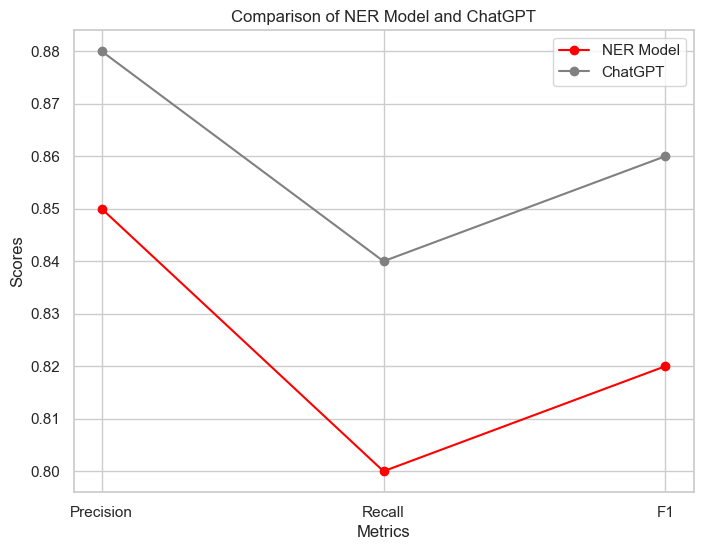

NER model precision:  0.85
NER model recall:  0.8
NER model F1 score:  0.82
ChatGPT precision:  0.88
ChatGPT recall:  0.84
ChatGPT F1 score:  0.86


In [ ]:
import matplotlib.pyplot as plt

ner = [ner_precision, ner_recall, ner_f1]
chatgpt = [chatgpt_precision, chatgpt_recall, chatgpt_f1]
labels = ['Precision', 'Recall', 'F1']

plt.figure(figsize=(8, 6))
plt.plot(labels, ner, marker='o', color='red', label='NER Model')
plt.plot(labels, chatgpt, marker='o', color='gray', label='ChatGPT')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Comparison of NER Model and ChatGPT')

plt.legend()

plt.show()

print('NER model precision: ', ner[0])
print('NER model recall: ', ner[1])
print('NER model F1 score: ', ner[2])
print('ChatGPT precision: ', chatgpt[0])
print('ChatGPT recall: ', chatgpt[1])
print('ChatGPT F1 score: ', chatgpt[2])


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

def count_entities(entities):
    return Counter(entities)

entity_counts = count_entities(entities)

# additional_data = load_additional_data() #optional

vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
text_vectorized = vectorizer.fit_transform(additional_data)

lda = LatentDirichletAllocation(n_components=10, random_state=0)
lda.fit(text_vectorized)


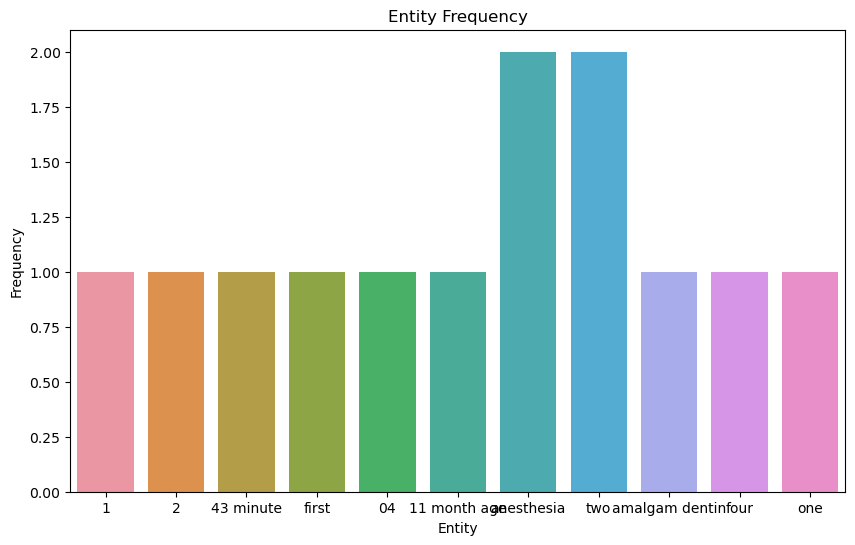

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

entity_counts = count_entities(entities)

plt.figure(figsize=(10, 6))
sns.barplot(x=list(entity_counts.keys()), y=list(entity_counts.values()))
plt.title('Entity Frequency')
plt.xlabel('Entity')
plt.ylabel('Frequency')
plt.show()


In [ ]:
def extract_entities_chatgpt(model, tokenizer, text):
    inputs = tokenizer.encode(text, return_tensors='pt')
    outputs = model.generate(inputs, max_length=100, num_return_sequences=1)
    generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    entities = extract_entities_from_text(generated_text)  # You need to implement this function
    return entities


In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel

app = FastAPI()

class EntityInput(BaseModel):
    text: str

@app.post('/entities')
def get_entities(input: EntityInput):
    entities = extract_entities_chatgpt(model, tokenizer, input.text)
    return {"entities": entities}


In [ ]:
import nest_asyncio
nest_asyncio.apply()

if __name__ == "__main__":
    import uvicorn
    uvicorn.run(app, host="127.0.0.1", port=8000)

INFO:     Started server process [1700]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
